In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA


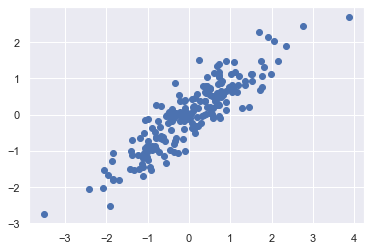

In [2]:
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [3]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print(X.shape)
print(X_pca.shape)

(200, 2)
(200, 1)


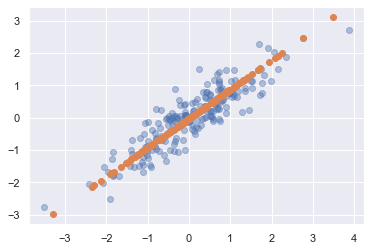

In [4]:
X_inverse = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.4)
plt.scatter(X_inverse[:, 0], X_inverse[:, 1])
plt.show()

In [5]:
# датасет с цифрами
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [6]:
pca = PCA(n_components=2)
pca.fit(digits.data)
X_pca = pca.transform(digits.data)
print(digits.data.shape)
print(X_pca.shape)


(1797, 64)
(1797, 2)


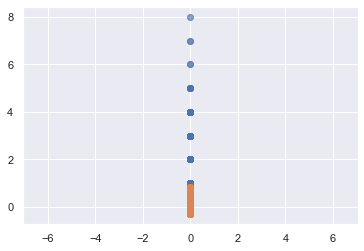

In [7]:
X_inverse = pca.inverse_transform(X_pca)
plt.scatter(digits.data[:, 0], digits.data[:, 1], alpha=0.4)
plt.scatter(X_inverse[:, 0], X_inverse[:, 1])
plt.axis('equal');

In [8]:
pca = PCA()
pca.fit(digits.data)
X_pca = pca.transform(digits.data)
print(X_pca.shape)

(1797, 64)


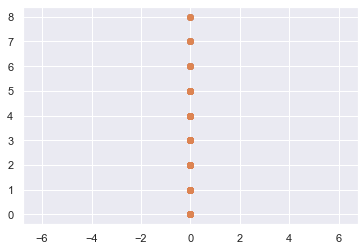

In [9]:
X_inverse = pca.inverse_transform(X_pca)
plt.scatter(digits.data[:, 0], digits.data[:, 1], alpha=0.4)
plt.scatter(X_inverse[:, 0], X_inverse[:, 1])
plt.axis('equal');

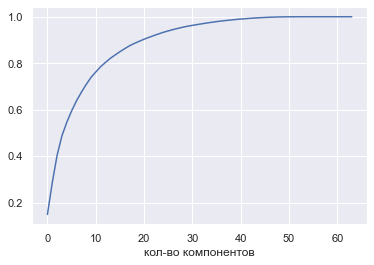

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('кол-во компонентов')
plt.show()

In [11]:
# добавление шума
rng = np.random.RandomState(42)
noise = rng.normal(scale=3, size=digits.data.shape)
X_noisy = digits.data + noise
X_noisy

array([[ 1.49014246, -0.4147929 ,  6.94306561, ..., -0.55697693,
        -3.31900492, -3.58861987],
       [ 2.43757747,  4.06872009, -0.21603036, ..., 16.57136688,
        -2.97160898, -1.69889319],
       [ 0.2989541 , -1.51042696, -4.65199029, ..., 11.45545833,
         7.66045514,  2.56919638],
       ...,
       [-0.20566025,  0.76512379,  1.7658095 , ..., -0.32279621,
         0.3086877 , -2.28833905],
       [-1.06378475,  4.03694803,  4.72515498, ...,  9.18486173,
         5.08895984, -1.07586162],
       [ 0.6986534 ,  8.78449389, 15.53243808, ..., 16.58555825,
        -2.72389158,  3.35266592]])

In [12]:
def plot_digits(X, title):
    """Small helper function to plot 100 digits."""
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((8, 8)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=24)

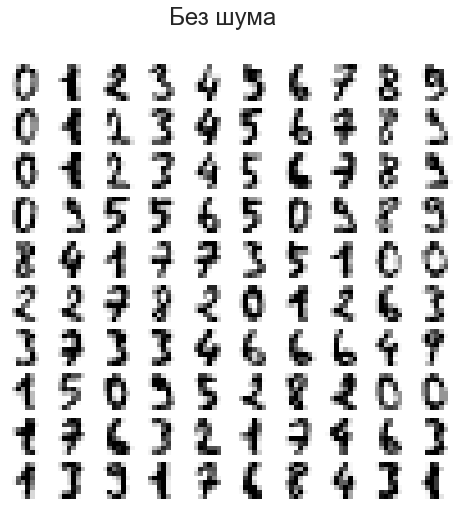

In [13]:
plot_digits(digits.data, "Без шума")

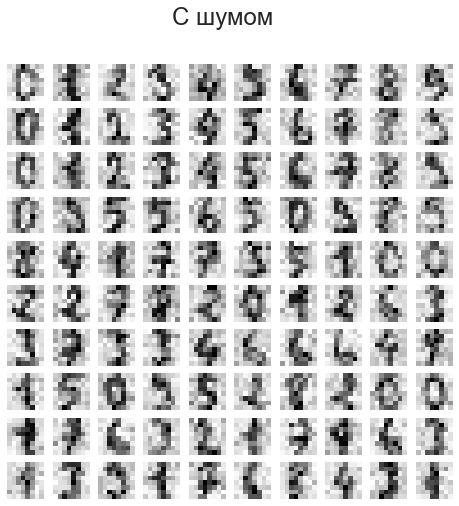

In [14]:
plot_digits(X_noisy, "С шумом")

In [15]:
pca = PCA(0.5).fit(X_noisy)
pca.n_components_

9

In [16]:
pca = PCA(n_components=9)
pca.fit(X_noisy)
X_pca = pca.transform(X_noisy)
print(X_pca.shape)

(1797, 9)


In [17]:
X_reconstructed_pca = pca.inverse_transform(pca.fit_transform(X_noisy))
X_reconstructed_pca.shape

(1797, 64)

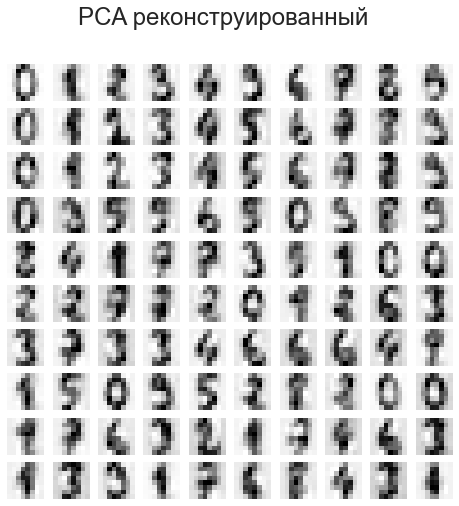

In [18]:
plot_digits(X_reconstructed_pca, "PCA реконструированный")

---

# Вывод:
Метод главных компонент для числа компонентов 9 значительно уменьшил кол-во шумов для изображений цифр.   
Цифры выделяются более четко, нежели на изображених с шумами.